<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/Deep-Learning-/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [26]:
X = np.array([[2,60],
              [3,65],
              [6,80],
              [7,85]], dtype=float)

y = np.array([[0],
              [0],
              [1],
              [1]], dtype=float)

In [27]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

In [28]:
model.compile(optimizer=SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(X, y, epochs=100, verbose=0)

In [30]:
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype(int)

print("Inputs:\n", X)
print("Predicted Outputs:\n", predictions)
print("Rounded Predictions (0/1):\n", predicted_classes)

# --------------------------------------------------------------
# 6️⃣ Show Weights and Bias
# --------------------------------------------------------------
weights, bias = model.layers[0].get_weights()
print("\nWeights:\n", weights)
print("Bias:\n", bias)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Inputs:
 [[ 2. 60.]
 [ 3. 65.]
 [ 6. 80.]
 [ 7. 85.]]
Predicted Outputs:
 [[1.]
 [1.]
 [1.]
 [1.]]
Rounded Predictions (0/1):
 [[1]
 [1]
 [1]
 [1]]

Weights:
 [[7.3500495 ]
 [0.90648293]]
Bias:
 [-0.6871713]


In [33]:
# ==============================================================
# MLP on Fashion-MNIST Dataset using TensorFlow / Keras
# ==============================================================

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# --------------------------------------------------------------
# 2️⃣ Preprocess Data
# --------------------------------------------------------------
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --------------------------------------------------------------
# 3️⃣ Build MLP Model
# --------------------------------------------------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Convert 28x28 → 784
    Dense(256, activation='relu'),     # Hidden layer 1
    Dropout(0.2),                      # Prevent overfitting
    Dense(128, activation='relu'),     # Hidden layer 2
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

# --------------------------------------------------------------
# 4️⃣ Compile Model
# --------------------------------------------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --------------------------------------------------------------
# 5️⃣ Train Model
# --------------------------------------------------------------
model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

# --------------------------------------------------------------
# 6️⃣ Evaluate Model
# --------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\n✅ Test Accuracy:", test_acc)
print("✅ Test Loss:", test_loss)

# --------------------------------------------------------------
# 7️⃣ Make Predictions
# --------------------------------------------------------------
predictions = model.predict(X_test[:5])
print("\nPredicted class probabilities (first 5 samples):\n", predictions)
print("Predicted Classes:", predictions.argmax(axis=1))

# --------------------------------------------------------------
# 8️⃣ Save Model (optional)
# --------------------------------------------------------------
model.save("fashion_mnist_mlp.h5")
print("\nModel saved as fashion_mnist_mlp.h5")

Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7414 - loss: 0.7390 - val_accuracy: 0.8450 - val_loss: 0.4177
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8501 - loss: 0.4148 - val_accuracy: 0.8648 - val_loss: 0.3669
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8694 - loss: 0.3542 - val_accuracy: 0.8727 - val_loss: 0.3486
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8719 - loss: 0.3482 - val_accuracy: 0.8777 - val_loss: 0.3372
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8824 - loss: 0.3188 - val_accuracy: 0.8720 - val_loss: 0.3346
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8829 - loss: 0.3093 - val_accuracy: 0.8803 - val_loss: 0.3184
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8935 - loss: 0.2864 - val_accuracy: 0.8843 - val_loss: 0.3126
Epoch 8/10
422/422 ━━━━━━━━━━━━


✅ Test Accuracy: 0.8812000155448914
✅ Test Loss: 0.3443051874637604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step



Predicted class probabilities (first 5 samples):
 [[4.30027818e-08 4.10822707e-07 4.23024460e-07 4.29255664e-07
  3.57983545e-08 1.33430548e-02 3.22596890e-07 1.78867560e-02
  2.76031500e-07 9.68768239e-01]
 [1.03052992e-06 1.42249714e-14 9.98890698e-01 5.71852232e-10
  7.79827591e-04 1.45910703e-12 3.28392460e-04 4.04755067e-14
  3.29264682e-09 1.02939765e-13]
 [3.13230192e-10 1.00000000e+00 2.69366712e-12 4.37762537e-09
  2.53019220e-11 8.71752247e-18 9.73656225e-12 4.07254723e-18
  1.54922106e-14 8.60794850e-17]
 [4.88205476e-10 9.99999881e-01 1.35925507e-10 1.11706690e-07
  4.33910907e-10 6.16422933e-16 1.20430207e-10 4.91815281e-16
  1.35788990e-13 1.63614426e-14]
 [3.22198495e-02 3.25771339e-07 8.54741596e-03 2.45133735e-04
  2.65809125e-03 2.88251528e-07 9.56293464e-01 2.59008004e-07
  3.51986600e-05 7.86127785e-08]]
Predicted Classes: [9 2 1 1 6]

Model saved as fashion_mnist_mlp.h5


# 2nd experiment


In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# --------------------------------------------------------------
# 2️⃣ Preprocess Data
# --------------------------------------------------------------
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --------------------------------------------------------------
# 3️⃣ Build MLP Model
# --------------------------------------------------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Convert 28x28 → 784
    Dense(256, activation='relu'),     # Hidden layer 1
    Dropout(0.2),                      # Prevent overfitting
    Dense(128, activation='relu'),     # Hidden layer 2
    Dense(10, activation='softmax')    # Output layer (10 digits)
])

# --------------------------------------------------------------
# 4️⃣ Compile Model
# --------------------------------------------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --------------------------------------------------------------
# 5️⃣ Train Model
# --------------------------------------------------------------
model.fit(X_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.1,
          verbose=1)

# --------------------------------------------------------------
# 6️⃣ Evaluate Model
# --------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\n✅ Test Accuracy:", test_acc)
print("✅ Test Loss:", test_loss)

# --------------------------------------------------------------
# 7️⃣ Make Predictions
# --------------------------------------------------------------
predictions = model.predict(X_test[:5])
print("\nPredicted class probabilities (first 5 samples):\n", predictions)
print("Predicted Classes:", predictions.argmax(axis=1))

# --------------------------------------------------------------
# 8️⃣ Save Model (optional)
# --------------------------------------------------------------
model.save("mnist_mlp.h5")
print("\nModel saved as mnist_mlp.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8301 - loss: 0.5746 - val_accuracy: 0.9648 - val_loss: 0.1195
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9573 - loss: 0.1431 - val_accuracy: 0.9710 - val_loss: 0.0925
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9712 - loss: 0.0954 - val_accuracy: 0.9738 - val_loss: 0.0869
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9766 - loss: 0.0744 - val_accuracy: 0.9805 - val_loss: 0.0711
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9814 - loss: 0.0601 - val_accuracy: 0.9812 - val_loss: 0.0608
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9853 - loss: 0.0482 - val_accuracy: 0.9813 - val_loss: 0.0654
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9873 - loss: 0.0391 - val_accuracy: 0.984


✅ Test Accuracy: 0.9810000061988831
✅ Test Loss: 0.06924672424793243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step



Predicted class probabilities (first 5 samples):
 [[6.06890135e-13 4.17960511e-09 1.05211875e-07 1.61744907e-07
  1.77112750e-16 5.28632997e-12 1.19143985e-16 9.99999762e-01
  1.30385605e-10 1.82152462e-08]
 [2.17992166e-10 8.63557580e-06 9.99991417e-01 2.34219085e-11
  4.90244935e-17 3.65014408e-11 2.51251641e-11 2.47726119e-14
  1.04535748e-10 3.80707991e-17]
 [4.16520578e-08 9.99989033e-01 2.60989083e-07 1.83288034e-08
  3.20709034e-07 1.38542205e-07 1.67670620e-07 4.74482658e-06
  4.58782597e-06 6.69553231e-07]
 [9.99992967e-01 2.00159320e-08 1.34581069e-06 3.10107851e-09
  1.57049840e-09 1.08383293e-08 4.53540633e-06 1.10013377e-06
  1.51952495e-09 4.95744992e-08]
 [3.33676724e-07 2.11500750e-09 8.18290005e-07 2.12642637e-09
  9.86580491e-01 9.36486777e-10 4.07500193e-06 1.31920126e-04
  1.46286027e-07 1.32820578e-02]]
Predicted Classes: [7 2 1 0 4]

Model saved as mnist_mlp.h5


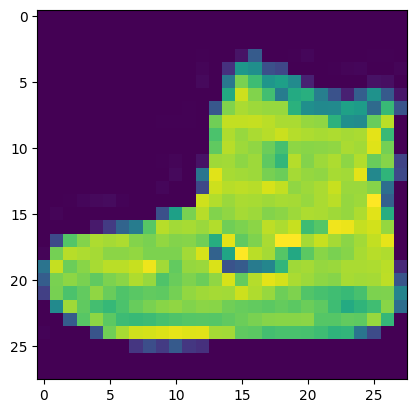

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)


In [40]:
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [41]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [42]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Convert 28x28 → 784
    Dense(256, activation='relu'),     # Hidden layer 1
    Dropout(0.2),                      # Prevent overfitting
    Dense(128, activation='relu'),     # Hidden layer 2
    Dense(10, activation='softmax')    # Output layer (10 digits)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(metrics=['accuracy'],optimizer='Adam',loss='sparse_categorical_crossentropy')